# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
#install.packages("mclust")
#install.packages("cluster")

library(mclust)
library(cluster)

#ruta datos: lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("semillas1.txt",dec=".")

summary(datos)
#datos con 6 caracteristicas

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

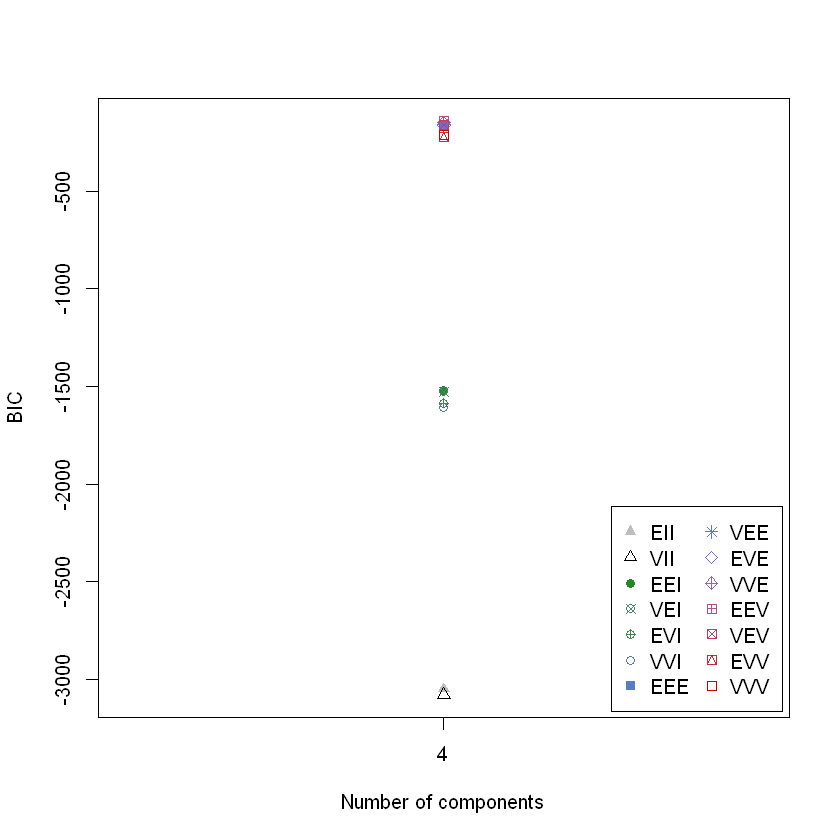

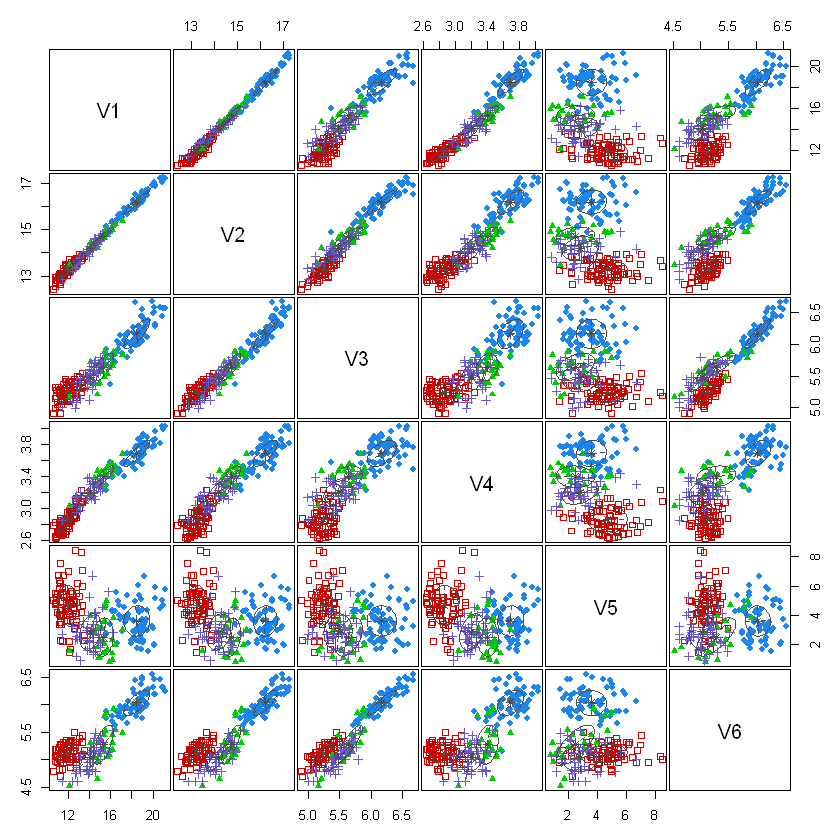

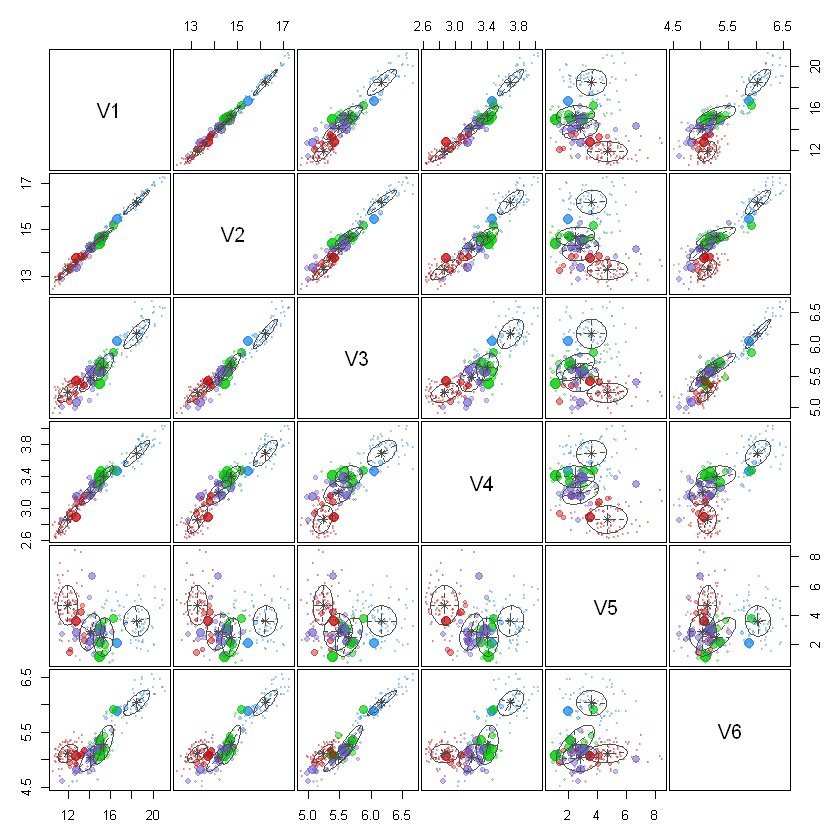

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

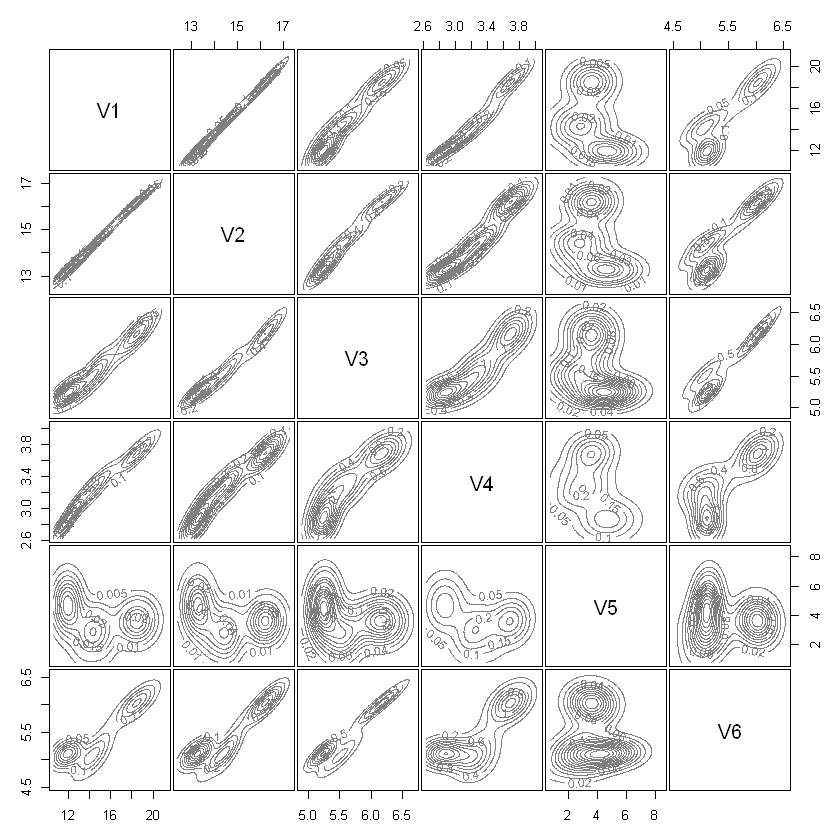

In [2]:
#G = numero de grupos
clus <-Mclust(datos, G=4)

#verosimilitud para comparar agrupamientos
summary(clus)

plot(clus)
clus

#Se generan distintas estructuras con codigos

#Grafico 1: El que queda mayor es la estructura que utiliza (EEV)

In [3]:
cl <- clus$classification
#Determina cuales son los parametros
centers <- t(clus$parameters$mean)
centers

cl

V1,V2,V3,V4,V5,V6
18.46213,16.19470,6.167813,3.690301,3.596481,6.033091
11.93175,13.27016,5.234781,2.863010,4.682985,5.113286
15.29414,14.71759,5.641832,3.398164,2.495003,5.274619
14.07522,14.18237,5.472207,3.200684,2.842341,5.035122


1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   2   4   4   3   4   1   4   2   3   1   1   1   2   2   3   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   4   2   2   3   2   4   4   1   4   4   2   3   1   1   1   2   4   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   2   2   1   1   2   2   2   1   4   1   2   4   4   1   3   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   1   4   4   1   4   1   3   1   2   1   3   1   1   4   1   4   1   4   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   3   3   4   1   2   4   2   2   2   2   2   4   2   3   2   1   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   1   2   3   4   4   3   4   3   1   4   2   2   2   3   4   3   2   4 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   1   2   2   1   1   4   4   3   3   4   2   2   1   1   1   2   3   1   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   2   1   2   2   1   2   2   1   1   2   4   2   2   2   2   1   4   2   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   4   3   4   2   4   2   2   4   2   2   4   1   1   1   4   1   4 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  2   1   2   4   4   1   1   1   1   2   2   2   2   1   1   2   2   2   4   1 
201 202 203 204 205 206 207 208 209 210 
  1   2   3   2   4   2   1   1   2   1

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida. 

In [4]:
#Respuesta
help(Mclust)
#Mclust es un método que se basa en mezclas finitas de Gaussianas parametrizadas. 
#El modelo se estima mediante el algoritmo EM inicializado por el agrupamiento aglomerativo jerárquico basado en modelos. 
#El modelo óptimo se selecciona luego según el criterio BIC (Bayesian Information Criterion).

#Parámetros de entrada:
args(Mclust)
# data: los datos de las variables que serviran para hacer el clustering
# G: Nro de Gruposm, por omisión el método evalua desde 1, 2 a 9 grupos.
# modelNames: string describiendo las distintas configuraciones de la distribución normal multivariada utilizada en el algoritmo EM. Por omisión el método evalúa 14 configuraciones distintas
# prior: posible distribución a priori definida por el usuario, por omisión no se provee.
# control: parámetros de control del algoritmo EM, por omisión no se provee.
# initializatin: parámetros para el clustering inicial, por omisión no se provee.
# warn: valor lógico asociado al manejo de advertencias (warnings)
# x: un objeto de la clase mclustBIC que utiliza un ajuste anterior para proveer los valores BIC de los distintos modelos.

model <- Mclust(datos)  # Realizar el clustering
str(model)
#La salida del método es un objeto de la clase Mclust, sus principales componentes son:
# data: la matriz con los datos en la entrada
# modelName: String que describe el modelo que obtuvo el valor óptimo del BIC
# n: número de observaciones en los datos
# d: dimensión de los datos (Nro de variables)
# G: número óptimo de grupos
# BIC: valores de BIC calculados.

# ICL: log de la verosimilitud del modelo con BIC óptimo
# df: Número de parámetros estimados
# bic: valor BIC del modelo seleccionado
# z: una matriz cuya componente [i,k] es la probabilidad de que la observación i en el data set pertenezca a la clase k.
# classification: la clasificación correspondiente a z, es decir la clase de mayor probabilidad para cada observación.
# parameters: pro, mean y variance: proporción, media y varianza estimadas de cada clase

function (data, G = NULL, modelNames = NULL, prior = NULL, control = emControl(), 
    initialization = NULL, warn = mclust.options("warn"), x = NULL, 
    verbose = interactive(), ...) 
NULL

List of 16
 $ call          : language Mclust(data = datos)
 $ data          : num [1:210, 1:6] 16.6 20 15.6 10.8 14.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:210] "1" "2" "3" "4" ...
  .. ..$ : chr [1:6] "V1" "V2" "V3" "V4" ...
 $ modelName     : chr "EEV"
 $ n             : int 210
 $ d             : int 6
 $ G             : int 2
 $ BIC           : 'mclustBIC' num [1:9, 1:14] -4583 -3642 -3178 -3050 -2970 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "1" "2" "3" "4" ...
  .. ..$ : chr [1:14] "EII" "VII" "EEI" "VEI" ...
  ..- attr(*, "G")= num [1:9] 1 2 3 4 5 6 7 8 9
  ..- attr(*, "modelNames")= chr [1:14] "EII" "VII" "EEI" "VEI" ...
  ..- attr(*, "control")=List of 4
  .. ..$ eps     : num 2.22e-16
  .. ..$ tol     : num [1:2] 1.00e-05 1.49e-08
  .. ..$ itmax   : int [1:2] 2147483647 2147483647
  .. ..$ equalPro: logi FALSE
  ..- attr(*, "initialization")=List of 3
  .. ..$ hcPairs: 'hc' num [1:2, 1:209] 44 88 6 205 139 177 8 120 8 178 ...
  .. .. ..

Mclust                 package:mclust                  R Documentation

_M_o_d_e_l-_B_a_s_e_d _C_l_u_s_t_e_r_i_n_g

_D_e_s_c_r_i_p_t_i_o_n:

     Model-based clustering based on parameterized finite Gaussian
     mixture models.  Models are estimated by EM algorithm initialized
     by hierarchical model-based agglomerative clustering. The optimal
     model is then selected according to BIC.

_U_s_a_g_e:

     Mclust(data, G = NULL, modelNames = NULL, 
          prior = NULL, 
          control = emControl(), 
          initialization = NULL, 
          warn = mclust.options("warn"), 
          x =  NULL, 
          verbose = interactive(), ...)
     
_A_r_g_u_m_e_n_t_s:

    data: A numeric vector, matrix, or data frame of observations.
          Categorical variables are not allowed. If a matrix or data
          frame, rows correspond to observations (n) and columns
          correspond to variables (d).

       G: An integer vector spec

b) Interprete y comente los resultados obtenidos.

In [5]:
#Respuesta
#El valor máximo de BIC se observa en G=4 para el modelo "EEV", que corresponde a una normal multivariada elipsoidal de igual forma y volumen. 
#De los gráficos de Plot se puede observar que las variables V1 y V2 son las que mayor concordancia tiene entre sus datos
#Pero aún así las variables V1, V2, V3, V4 también.

Análisis de Componentes Principales para graficar los grupos obtenidos

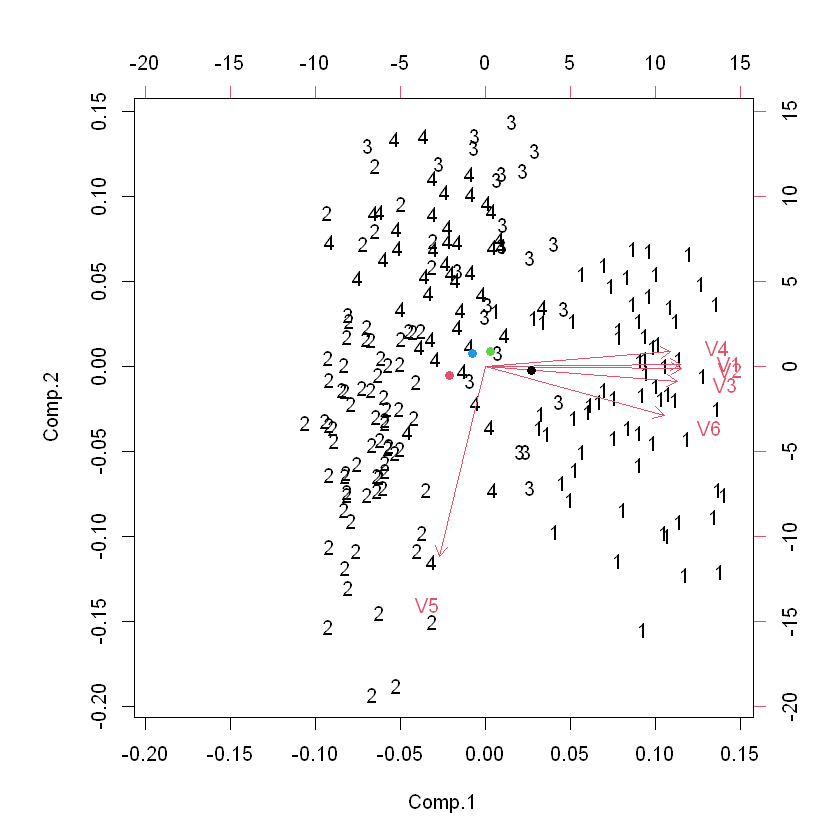

In [6]:
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

#Muestra los grupos 
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 2 components: 

 log-likelihood   n df      BIC       ICL
       80.12963 210 49 -101.749 -104.2238

Clustering table:
  1   2 
 71 139 

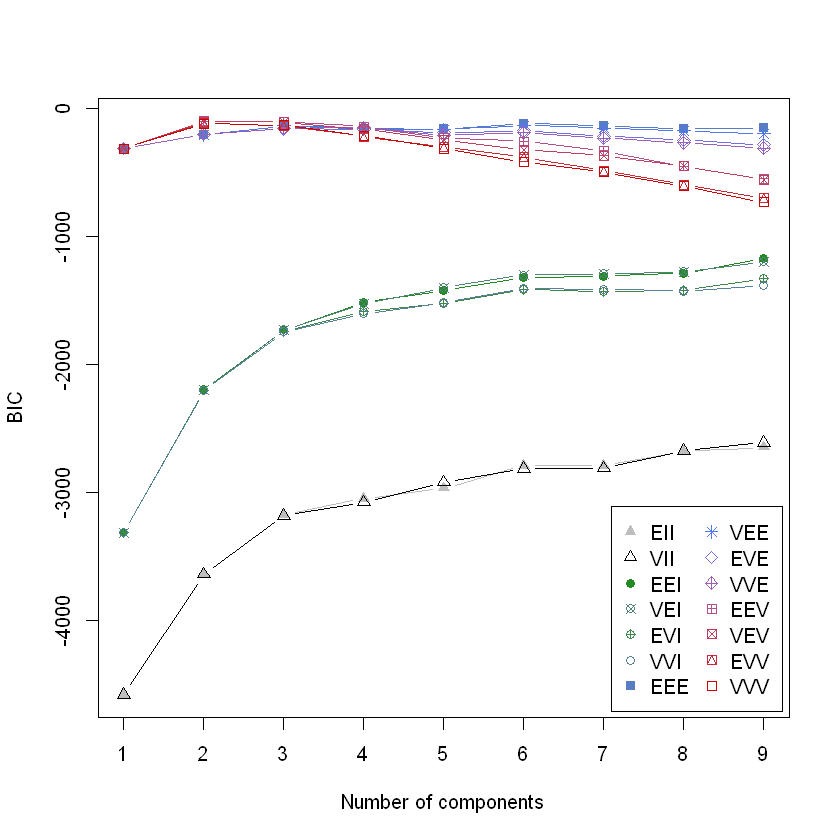

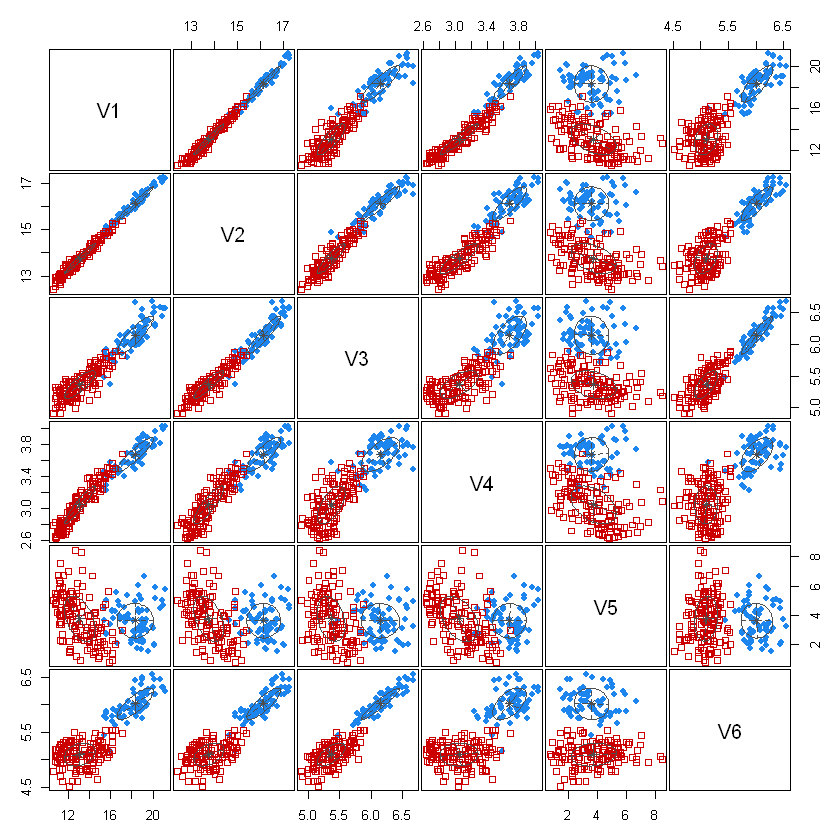

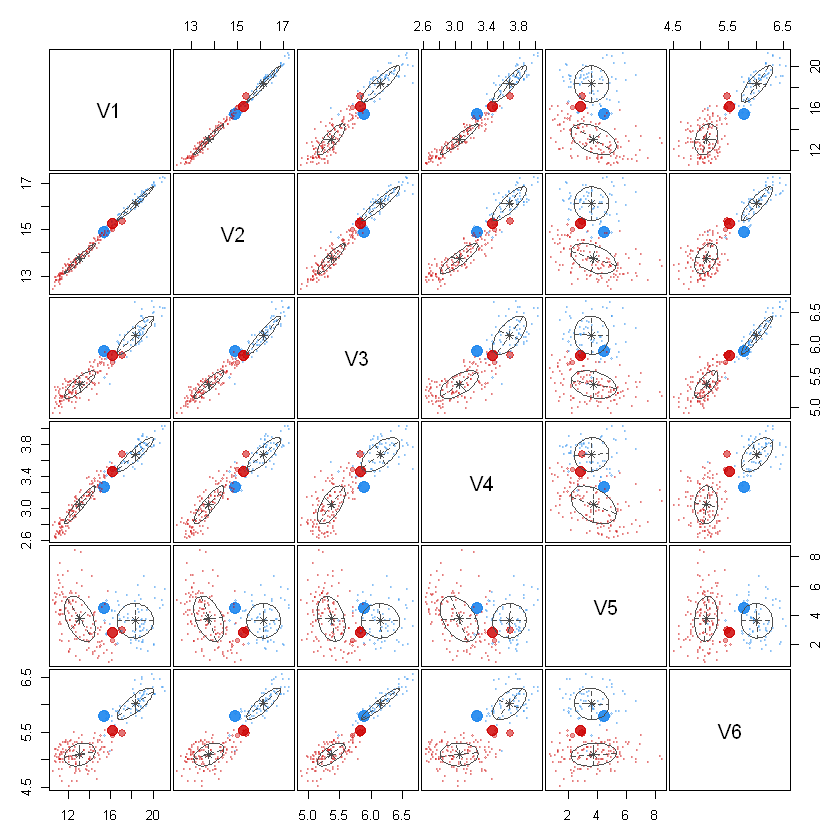

'Mclust' model object: (EEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

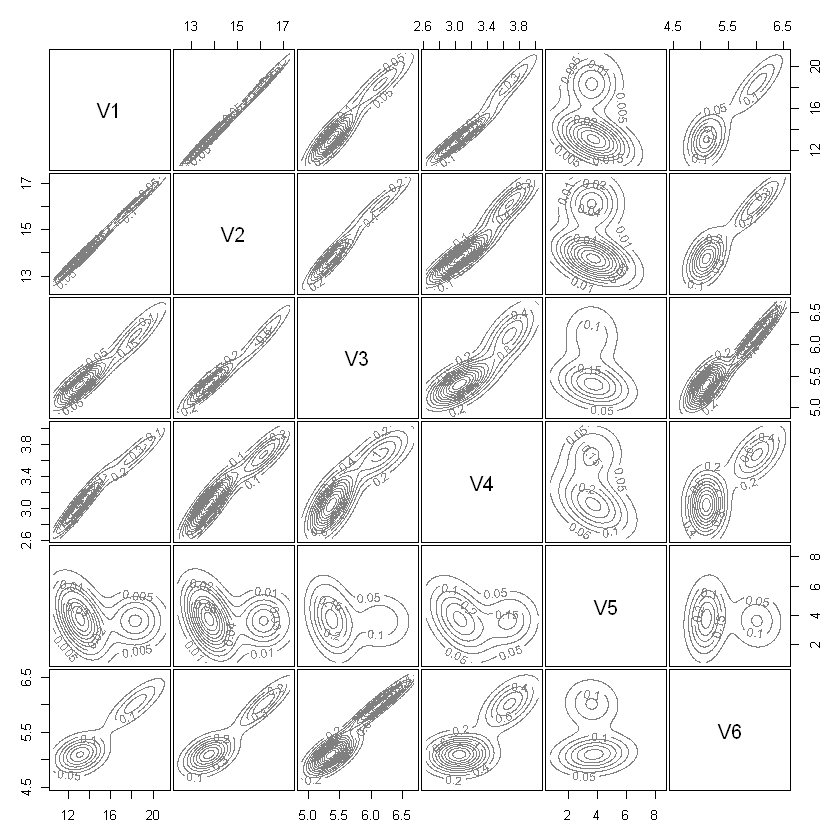

In [7]:
#Respuesta
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus

#El numero de grupos optimo es 3, ya que es el que tiene el valor de BIC mas alto.(?) 

In [8]:

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Ejemplo de respuesta
        #De acuerdo al gráfico de BIC, en G=2 tenemos un primer máximo local.

        #Los siguientes máximos locales se ubican en G=6 y G=9. 
        #Puesto que para G=3 tenemos una buena interpretación, es razonable 
        #quedarnos con este número de grupos.


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood   n df      BIC       ICL
       137.5368 210 71 -104.571 -114.2201

Clustering table:
 1  2  3 
68 83 59 

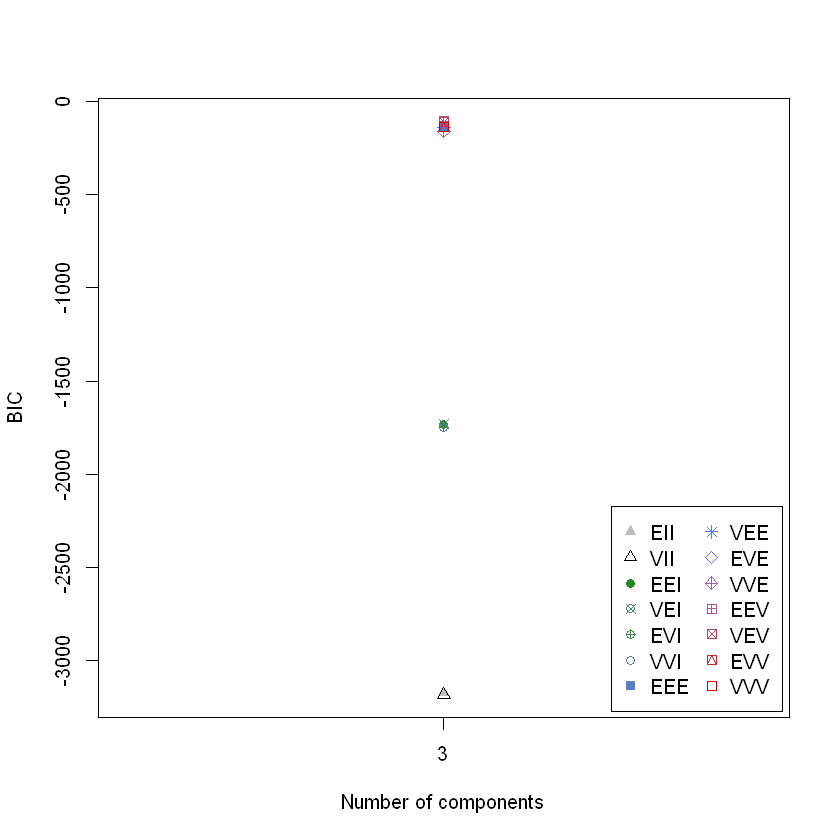

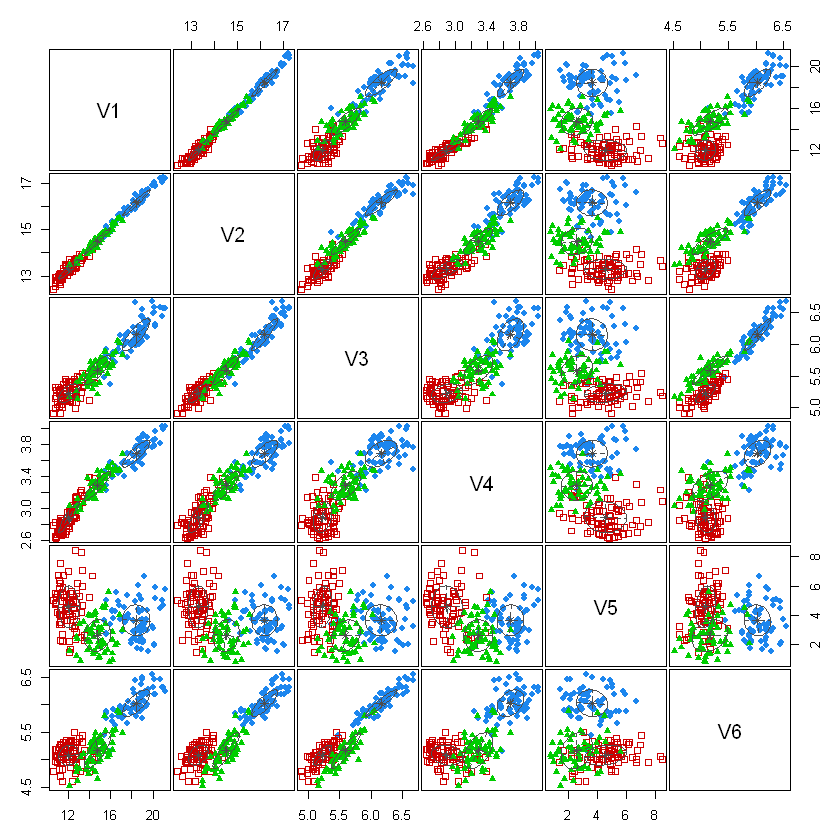

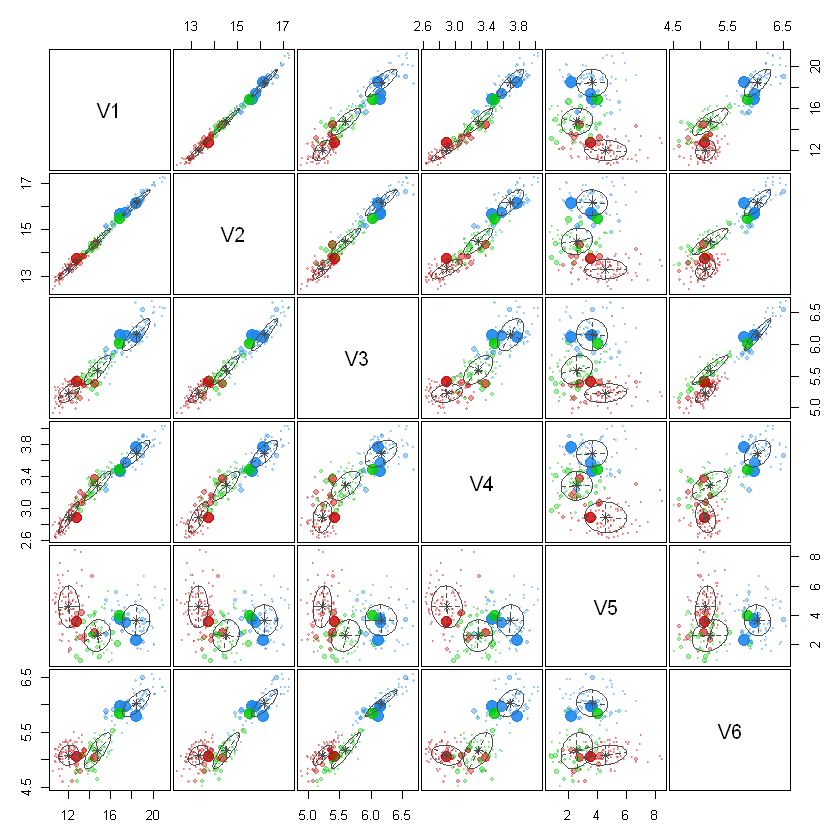

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

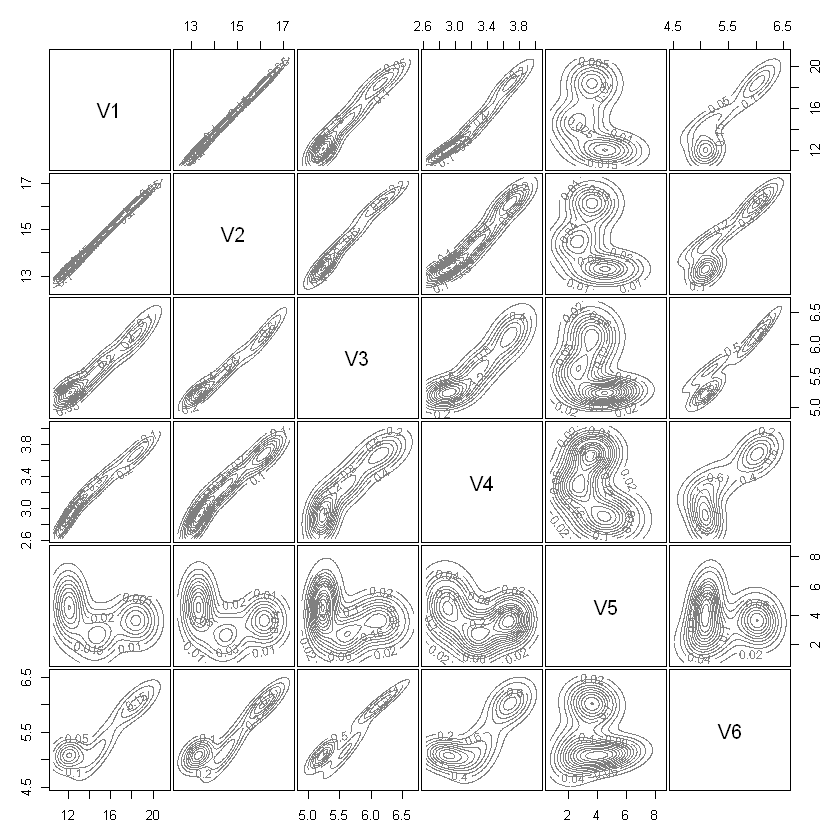

In [9]:
clus3 <-Mclust(datos, G=3)
summary(clus3)
plot(clus3)
clus3

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

In [10]:
#Respuesta
    #En ambos metodos utilizados tenemos que se ajusta a un modelo de 3 grupos, sin embargo la diferencia
    #encontrada se ve reflejada en que en el caso de kmeans se obtienen grupos mas definidos,
    #en cambio en GMM se pueden observar zonas de traslape, lo que ocurre por tener la posibilidad de que el punto evaluado pertenezca a mas de un grupo.
    #Esta caracteristica nos muesta que GMM es mas robusto ante los pequeños errores en los datos o variaciones que estos puedan tener. 

**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

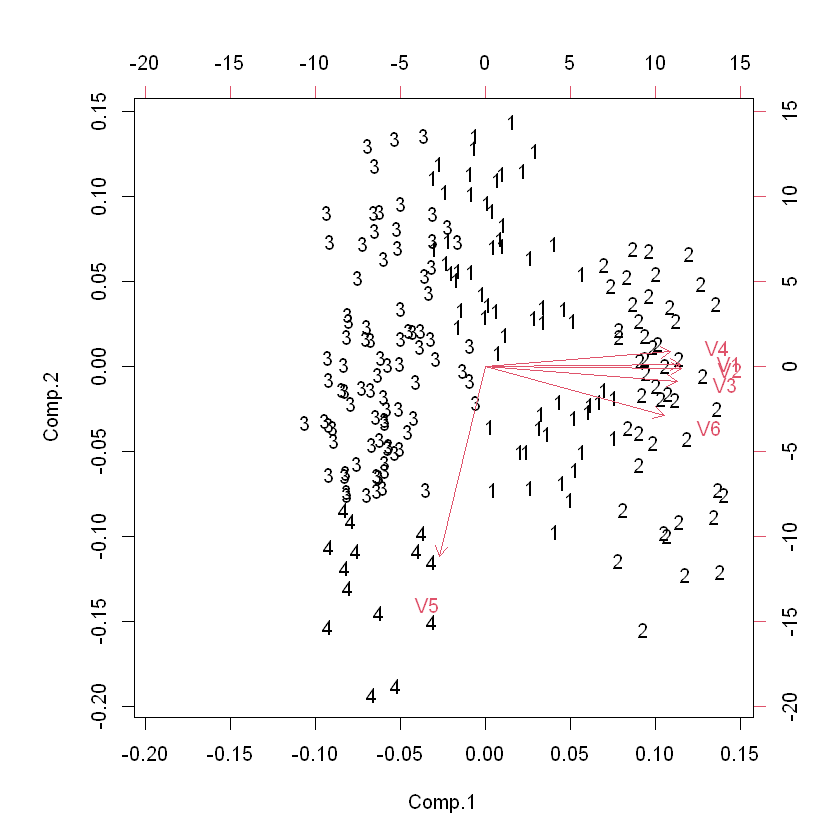

In [11]:
#hclust para hacer argupamiento jerarquico
res3 <- hclust(dist(datos))
#corta el agrupamiento en 4
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

In [12]:
#Respuesta
help(hclust)
#El método hclust se basa en la técnica de agrupamiento aglomerativo, donde comienza con cada observación 
#como un clúster individual y luego combina iterativamente los clústeres más similares hasta que se forma un solo 
#clúster que contiene todas las observaciones.

#Parámetros de entrada
args(hclust)
#d: matriz de disimilaridades = matriz del método dist.  
#method: método de aglomeración definido (("single", "complete", "average", etc.), por omisión utiliza "complete".
#members: permite identificar grupos iniciales a partir de los cuales se desarrolla el algoritmo aglomerativo

#La salida del método es un objeto de la clase hclust
#merge: una matriz de (n-1)x2 que contiene en cada fila, un paso en el algoritmo aglomerativo, descritos por los índices (con signo -) de las observaciones que se agrupan, o el número del paso (con signo +) del paso anterior en que se definió el grupo que se va a fusionar.
#height: el valor de la disimilaridad entre grupos que dio origen a la fusión de dos grupos en cada uno de los n-1 pasos.
#order: un vector que da la permutación de las observaciones originales adecuadas para graficar, para no tener cruces de ramas.

function (d, method = "complete", members = NULL) 
NULL

hclust                  package:stats                  R Documentation

_H_i_e_r_a_r_c_h_i_c_a_l _C_l_u_s_t_e_r_i_n_g

_D_e_s_c_r_i_p_t_i_o_n:

     Hierarchical cluster analysis on a set of dissimilarities and
     methods for analyzing it.

_U_s_a_g_e:

     hclust(d, method = "complete", members = NULL)
     
     ## S3 method for class 'hclust'
     plot(x, labels = NULL, hang = 0.1, check = TRUE,
          axes = TRUE, frame.plot = FALSE, ann = TRUE,
          main = "Cluster Dendrogram",
          sub = NULL, xlab = NULL, ylab = "Height", ...)
     
_A_r_g_u_m_e_n_t_s:

       d: a dissimilarity structure as produced by 'dist'.

  method: the agglomeration method to be used.  This should be (an
          unambiguous abbreviation of) one of '"ward.D"', '"ward.D2"',
          '"single"', '"complete"', '"average"' (= UPGMA), '"mcquitty"'
          (= WPGMA), '"median"' (= WPGMC) or '"centroid"' (= UPGMC).

 members: 'NULL' or a vector w

b) Interprete y comente los resultados obtenidos. 


In [13]:
#Respuesta

#el agrupamiento obtenido con 4 grupos es muy similar a aquel que se obtiene con kmeans. 
#ya que ambos métodos buscan agrupar los datos en grupos similares. Además, gracias a 
#la utilización de la distancia euclidiana como función de disimilud produce
#resultados similares.

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

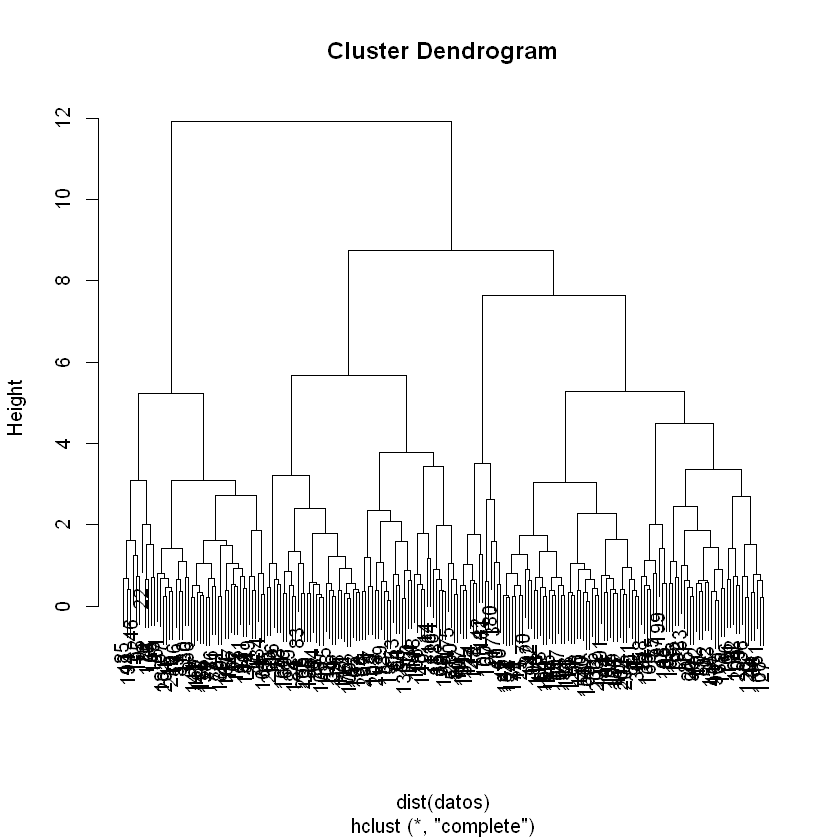

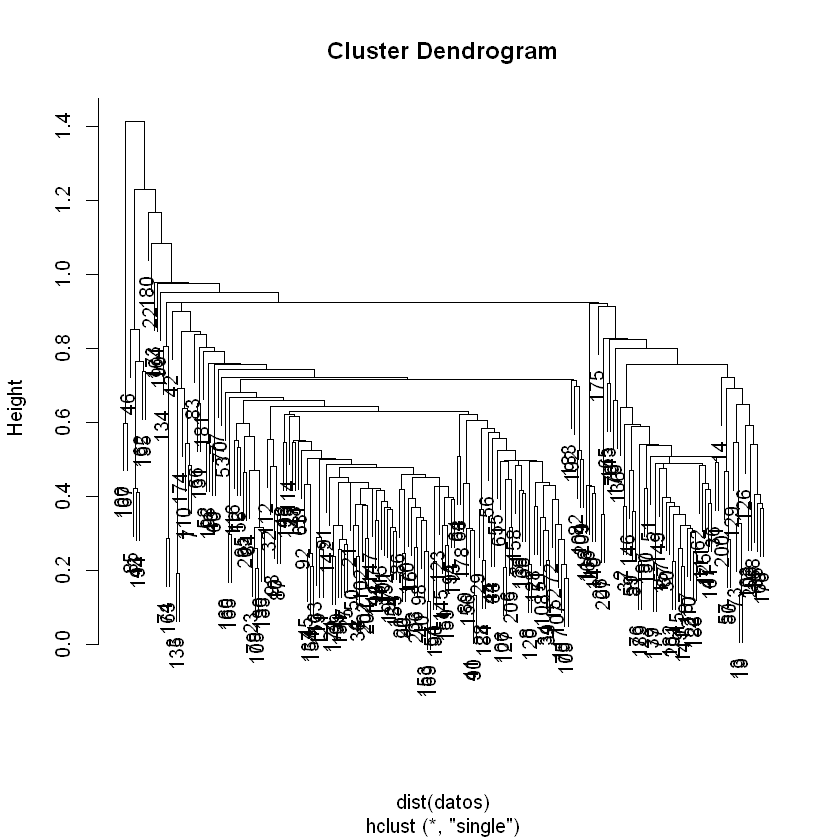

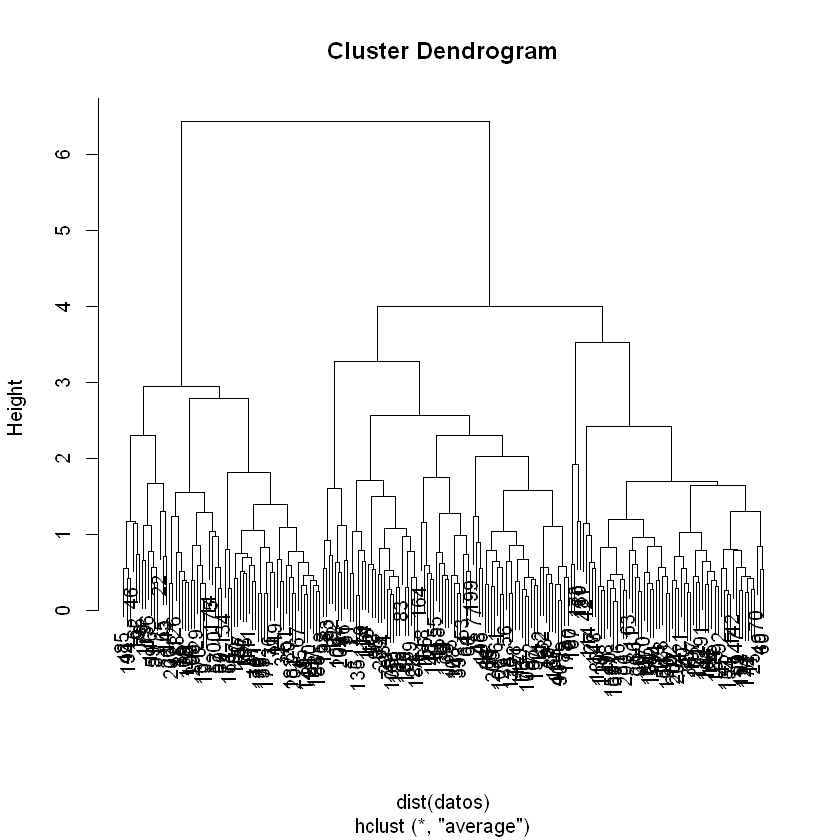

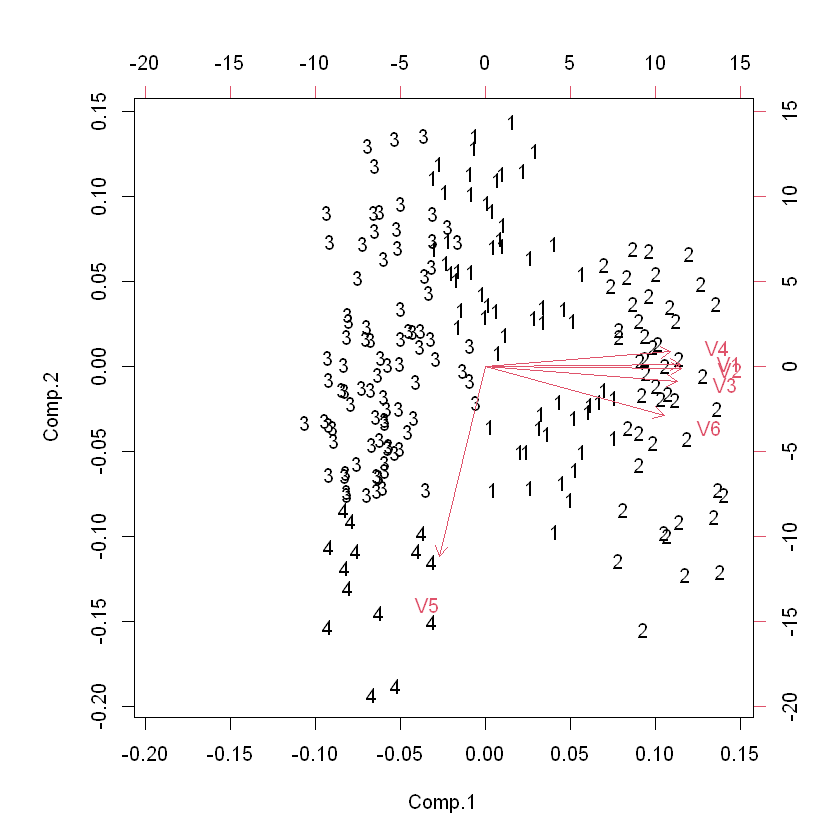

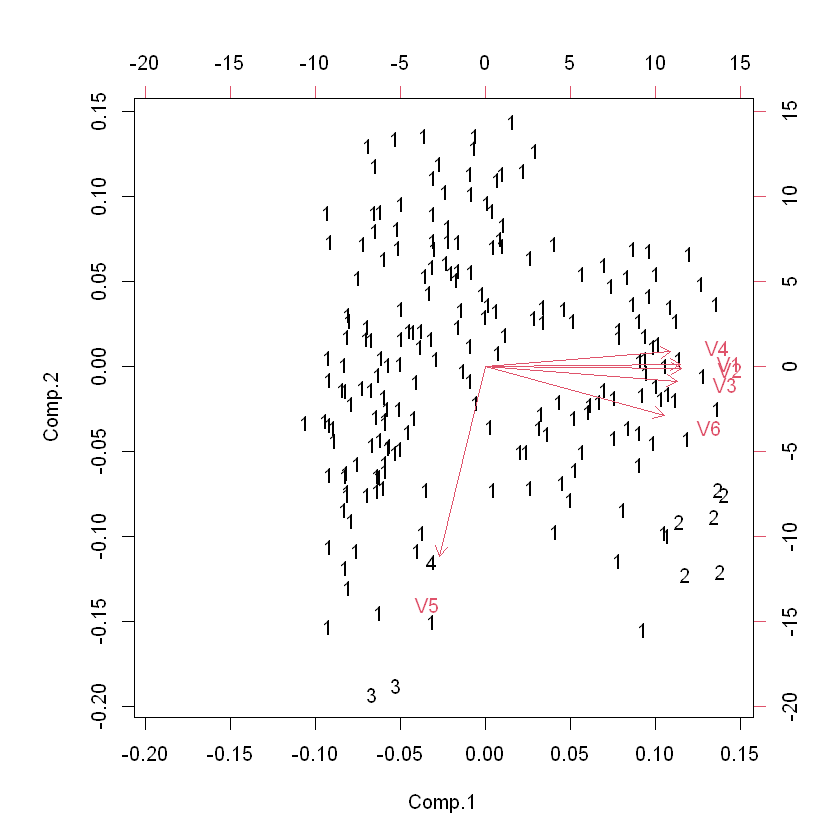

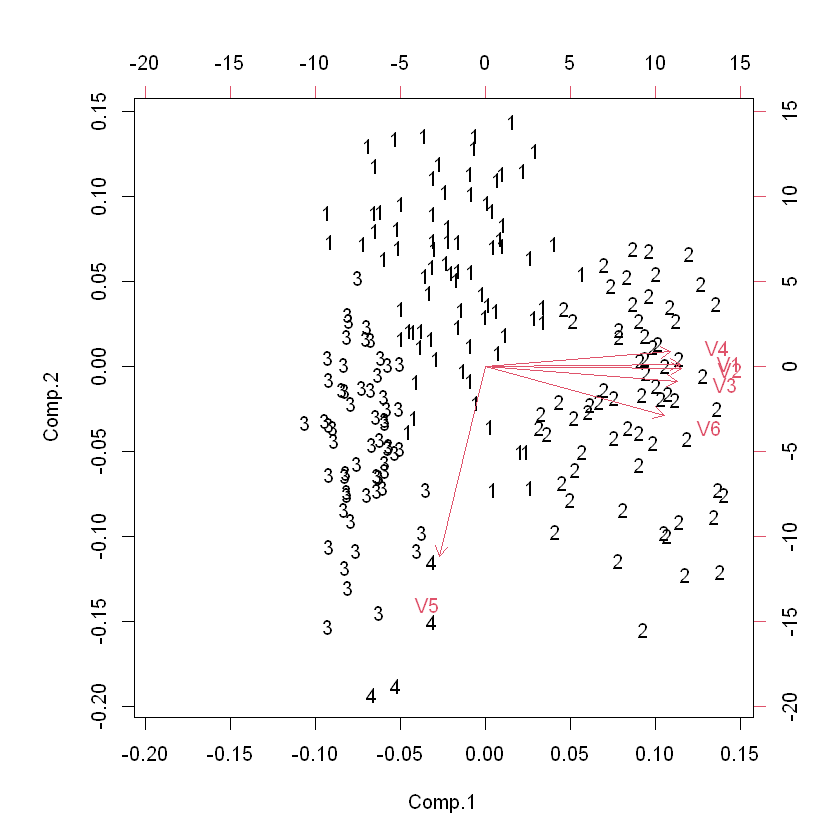

In [14]:
res4 <- hclust(dist(datos),method="single")
res5 <- hclust(dist(datos),method="average")
plot(res3)
plot(res4)
plot(res5)
biplot(res, xlabs= cutree(res3,4))
biplot(res, xlabs= cutree(res4,4))
biplot(res, xlabs= cutree(res5,4))

In [15]:
#Respuesta

#Se varíaron los metodos de hclust -> utilizando "complete", "single" y "averege"
#Para el conjunto de datos entregados por el metodo "complete" y "average" las diferencias son pequeñas.
#Mientras que estos mismos conjuntos si los comparamos con el método "single" las diferencias son altas
#de hecho, son completamente diferentes en algunos casos.
#La principal diferencia se encuentra en el grupo 1 que es mucho más amplio al utilizar "single". El grupo 4 es casi inexistente
#Otra diferencia es que utilizando "averege" el grupo 4 vuelve a tener un poco de existencia, pero demasiado pequeña frente a los 
#otros grupos


**Ejercicio 4:** (3 puntos)

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian


In [16]:
#purity
    #Este concepto se utiliza como una medida para la evaluacion de la calidad de un agrupamiento.
    #esto basandose en la proporcion de nuestros objetos que pertenecen a la misma clase o categoria dentro de un cluster
    #teniendo en cuenta que esto va desde 0 (malo) a 1 (bueno)
    #Igualmente la pureza no tiene en cuenta la cantidad de clusters evaluados, lo que no se estaria penalizando por la cantidad de clusters.

#rand index
    #  medida que se utiliza para evaluar qué tan similar es una agrupación de datos con respecto a otra agrupación de dato
    # se calcula comparando los pares de datos en ambas agrupaciones. 
    # RI = (TP + TN) / (TP + FP + TN + FN)
#mutual information 
    #Se evalua la informacion mutua entre U y V, en la cual se obtiene una probabilidad de que un objeto random pertenezca a ambos clusteres,
    #Igualmente se obtiene una probabilidad de que un objeto random pertenezca a un cluster en especifico.
    # !!!! falta mas u.u

In [17]:
datos1 <-read.table("semillas.txt",dec=".")
summary(datos1)

#Respuesta

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

In [18]:
datosv1v6 <- datos1[,1:6]
datosv1v6

,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,16.63,15.46,6.053,3.465,2.040,5.877
120,20.03,16.90,6.493,3.857,3.063,6.320
139,15.60,15.11,5.832,3.286,2.725,5.752
194,10.82,12.83,5.180,2.630,4.853,5.089
49,14.79,14.52,5.545,3.291,2.704,5.111
12,14.03,14.16,5.438,3.201,1.717,5.001
10,16.44,15.25,5.884,3.505,1.969,5.533
14,13.78,14.06,5.479,3.156,3.136,4.872
92,18.76,16.20,6.172,3.796,3.120,6.053


b) Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico, con las variables de caracterización de las semillas (V1 a V6)  y considerando K=3 como número de grupos.

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood   n df      BIC       ICL
       137.5368 210 71 -104.571 -114.2201

Clustering table:
 1  2  3 
68 83 59 

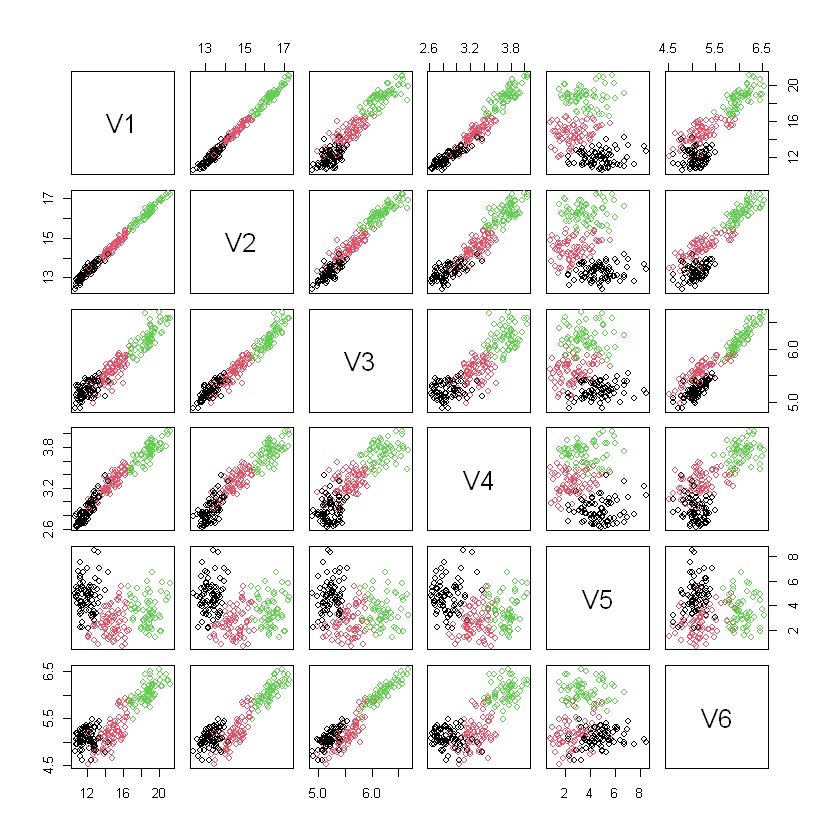

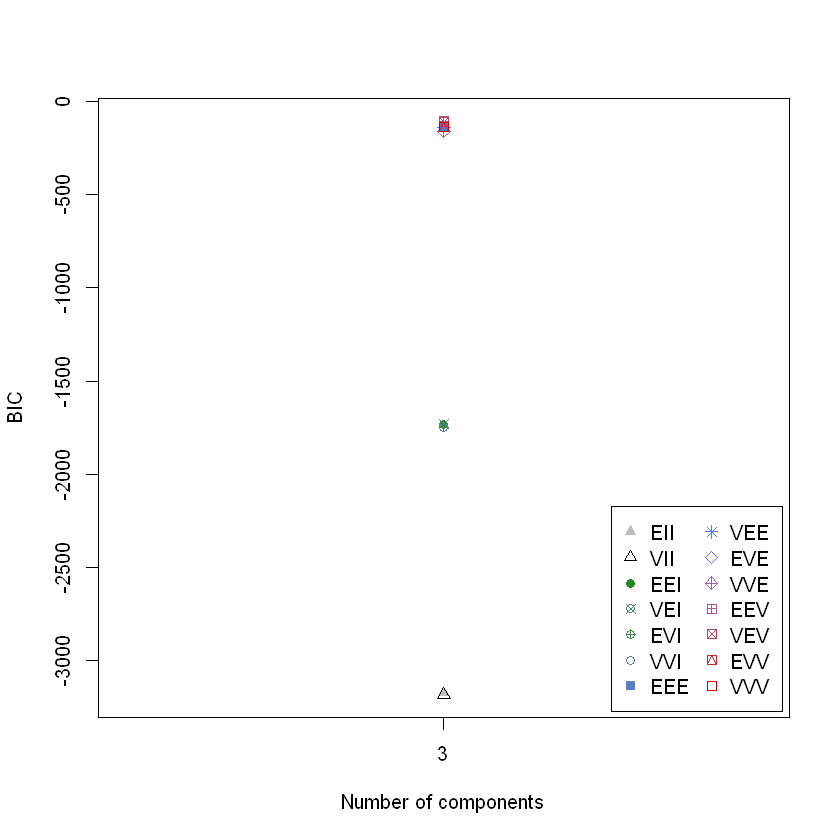

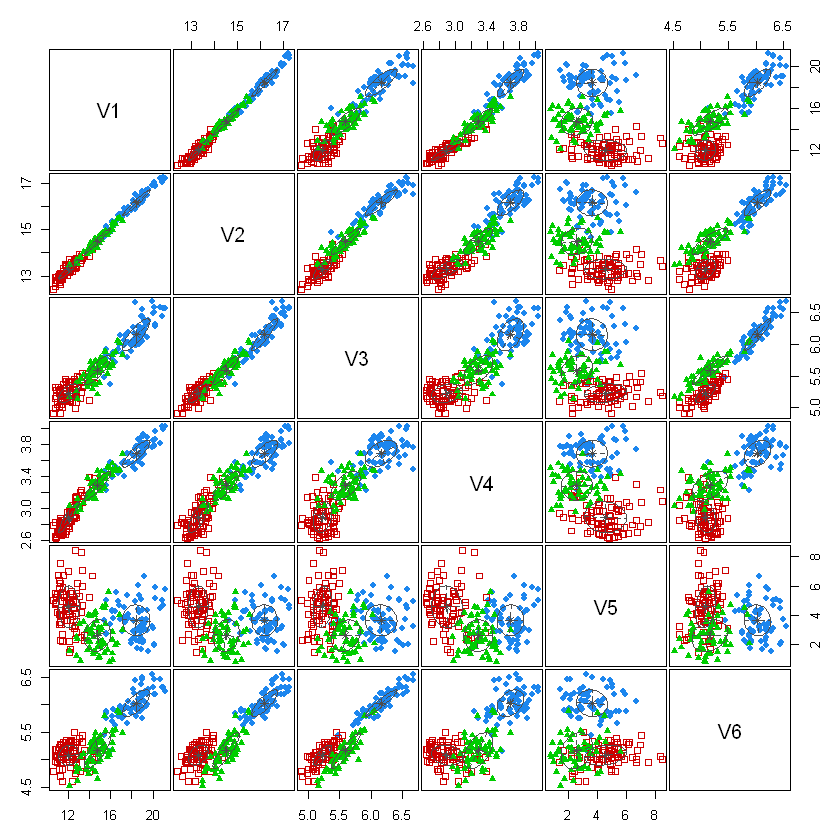

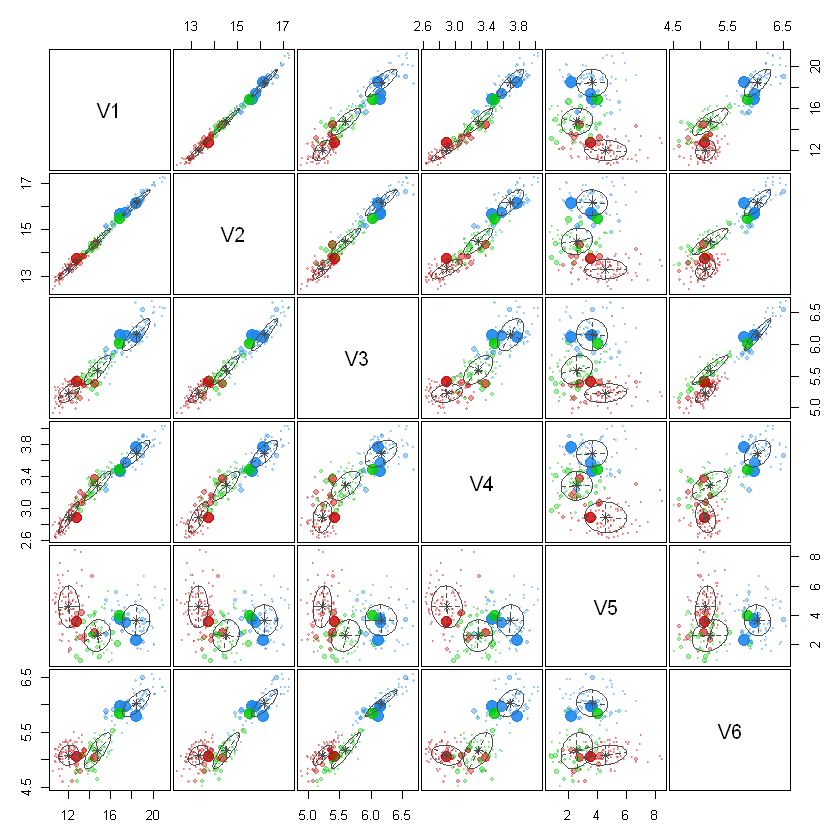

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

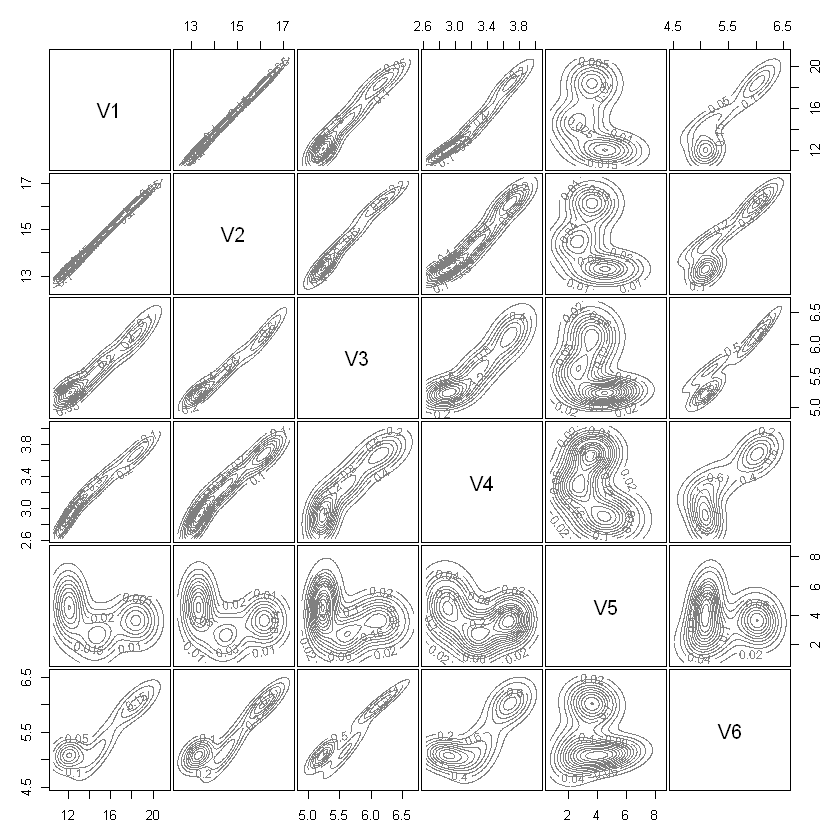

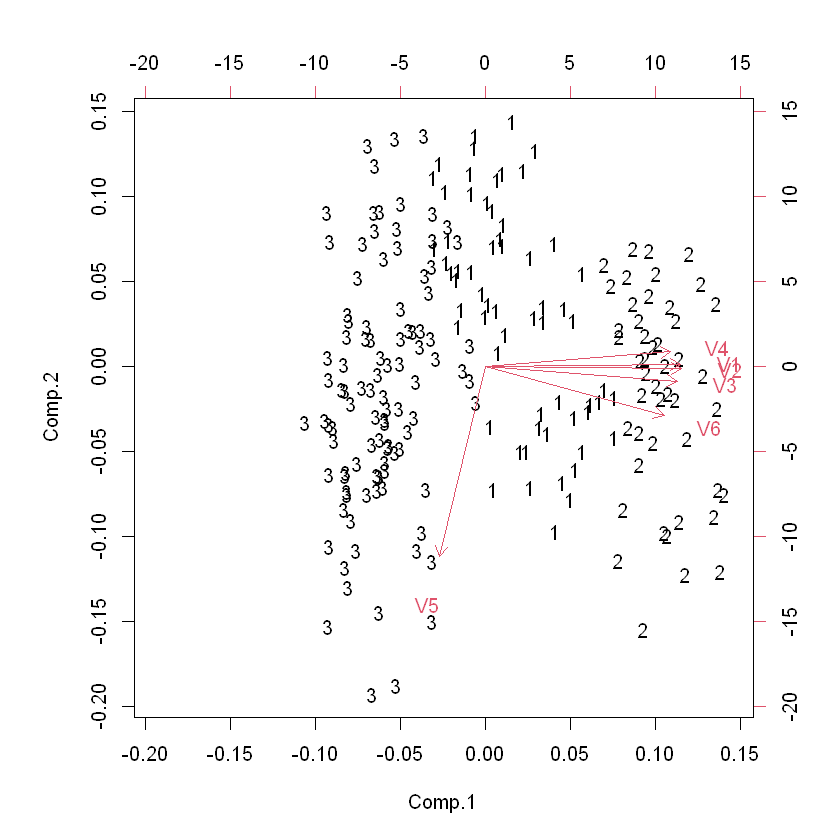

In [19]:
# Clustering



# Kmeans
k0=3
cl<-kmeans(datosv1v6,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)


# GMM
clus3 <-Mclust(datosv1v6, G=3)
summary(clus3)
plot(clus3)
clus3

# Análisis jerarquico
res <- princomp(datosv1v6, cor=TRUE)
analisisJerarquico <- hclust(dist(datosv1v6))
biplot(res, xlabs= cutree(analisisJerarquico,3))

c) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos en (b), considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

In [32]:
#Respuesta

classes <- datos1[,7]
clusters <- cl$cluster
table(classes,clusters)

       clusters
classes  1  2  3
      1  9 60  1
      2  0 10 60
      3 68  2  0

In [33]:
purity(classes,clusters)

[1] 0.8952381